# WINE QUALITY CLUSTERING

PROBLEM STATEMENT: To make use of wine quality data and to create clusters/groups based on similarities between
them.

First we start by loading the required Packages

In [1]:
from sklearn.cluster import DBSCAN 
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import sklearn.metrics as sk
from sklearn.cluster import KMeans
from math import sqrt
from sklearn import preprocessing
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
from pandas import get_dummies
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import warnings
import sklearn
import scipy
import numpy
import json
import sys
import csv
import os


In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Read the wine quality data

In [3]:
#read test and train data
df=pd.read_csv('C:\\Users\\admin\\Downloads\\winequality.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1,white


# Correlation matrix to check multicollinearity


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743,-0.049447
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699,-0.151714
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532,0.054444
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980,-0.063992
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666,-0.161781
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463,0.014767
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385,-0.051226
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858,-0.275441
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506,0.028149
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485,0.033971


Text(0.5, 1, 'heat map')

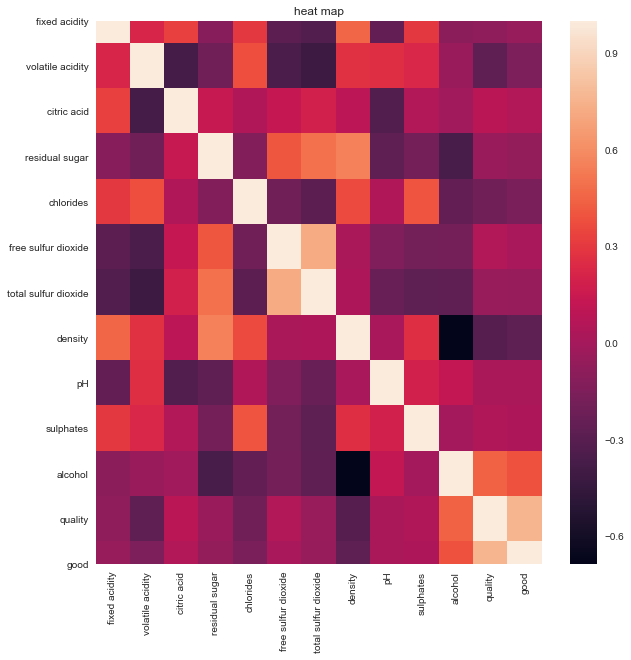

In [4]:
#correltaion matrix/heatmap
df.corr()
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(df.corr())
plt.title('heat map')

Observing the heatmap, it is found that 'quality' column is highly correlated to 'good'column. Also, correlation between 'free sulfur dioxide' and 'total sulfur dioxide' is high. Thus it is logical to remove one among them to reduce redundancy. Since , 'free sulfur dioxide' is part of the 'total sulfur dioxide' ,lets remove 'free sulfur dioxide'.Besides, 'color' column is removed to check whether final clusters formed have similarites based on color features.

In [5]:
x=df.drop(['free sulfur dioxide','good','color'],axis=1)

# one-hot encoding

In [6]:
x_onehot=pd.get_dummies(x)

# Data normalisation

In [7]:
#standardising data
x_scale = StandardScaler().fit_transform(x_onehot)

# K-Means Clustering

# Elbow method to identify number of clusters.

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=1, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

Text(0.5, 1.0, 'Elbow Method')

Text(0.5, 0, 'Number of clusters')

Text(0, 0.5, 'WCSS')

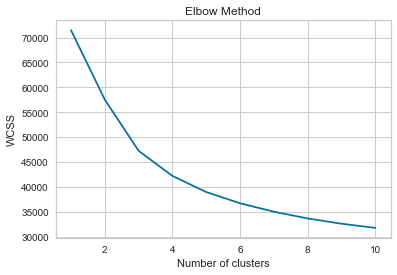

In [8]:
#elbow method to find n clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x_scale)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

As observed from the elbow method, we cannot decide on where the inertia seems to level off(between 2 and 4) to select the value for number of clusters. Thus we shall move on to one more method by name 'silhouette method' to identify number of clusters.

# Silhouette method

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x00000267DFAB8FC8>,
                 k=None, locate_elbow=True, metric='silhouette', model=None,
                 timings=False)

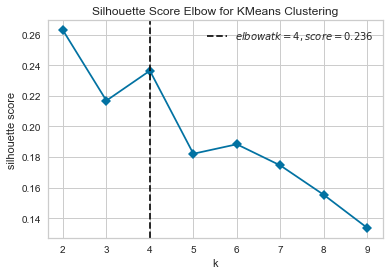

In [9]:
#check silhouette score
# Instantiate a scikit-learn K-Means model
model = KMeans(random_state=0)

# Instantiate the KElbowVisualizer with the number of clusters and the metric 
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette', timings=False)

# Fit the data and visualize
visualizer.fit(x_scale)    
visualizer.poof()   

The above graph depicts that the highest silhouette score is obtained when we select number of groupings to be 2.Thus moving forward to apply k-Means algorithm.

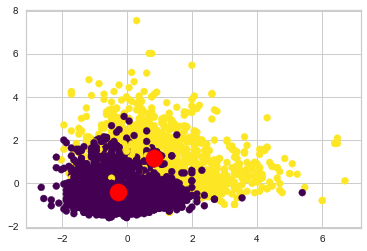

1.7075880651110966

In [10]:
#applying kmeans algorith
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(x_scale)
plt.scatter(x_scale[:,0],x_scale[:,1],c=pred_y,cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()
#calculating davies bouldin score
sklearn.metrics.davies_bouldin_score(x_scale,pred_y)

# Comparisons to check similarity

In [11]:
#comparisons
x_kmeans=x.copy()
x_kmeans['labels']=pred_y
x_kmeans.groupby('labels').mean()
df.groupby('color').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
labels,,,,,,,,,,,
0,6.850041,0.274653,0.334958,6.387132,0.044904,138.123123,0.993997,3.188116,0.489235,10.530267,5.894878
1,8.300611,0.532836,0.270128,2.638661,0.089103,49.251834,0.996774,3.308784,0.656161,10.377506,5.591076


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good
color,,,,,,,,,,,,,
red,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023,0.135710
white,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909,0.216415


The above two tabular comparisons shows that our obtained clusters have staistics which are more or less similar to that of the original dataframe when grouped by 'color' feature. The similarities in mean values of features like 'fixed acidity','alcohol','density' etc. signifies the fact that wines are closely grouped as per their colours. 

# Agglomerative Clustering

# Plotting dendrogram to identify number of clusters

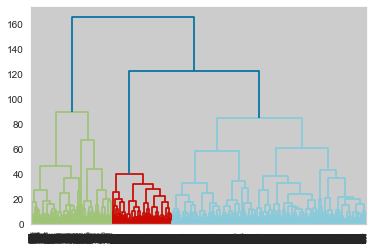

In [12]:
#hierarchical clustering-plotting dendrogram
dendrogram = sch.dendrogram(sch.linkage(x_scale, method='ward'))

From the dendrogram plot above, it can be inferred that number of clusters can be selected as 2.

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

<Figure size 720x504 with 0 Axes>

1.6988724868237761

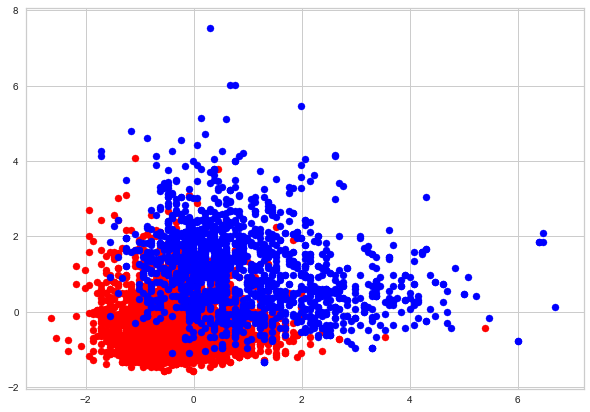

In [13]:
#applying agglomerative clustering algorithm
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
model.fit_predict(x_scale)
labels = model.labels_
#plotting clusters on scatter plot
plt.figure(figsize=(10, 7))
plt.scatter(x_scale[labels==0, 0], x_scale[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(x_scale[labels==1, 0], x_scale[labels==1, 1], s=50, marker='o', color='blue')
sklearn.metrics.davies_bouldin_score(x_scale,labels)

# Comparisons to check similarties

In [14]:
x_hrcl=x.copy()
x_hrcl['labels']=labels
x_hrcl.groupby('labels').mean()
df.groupby('color').mean()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
labels,,,,,,,,,,,
0,6.839252,0.278310,0.332779,6.368775,0.045367,137.878871,0.994006,3.190935,0.490112,10.533628,5.888142
1,8.376841,0.529179,0.274940,2.584487,0.088982,47.377596,0.996831,3.303644,0.658389,10.362608,5.602895


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good
color,,,,,,,,,,,,,
red,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023,0.135710
white,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909,0.216415


# DBSCAN

[0 0 0 ... 0 0 0]
['y', 'b', 'g', 'r']


Text(0.5, 1.0, 'number of clusters: 2')

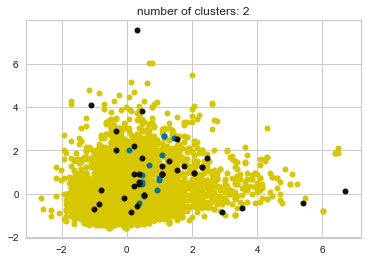

1.787370322107759

In [18]:
#density based clustering
db = DBSCAN(eps=3, min_samples=10).fit(x_scale) 
core_samples_mask = np.zeros_like(db.labels_, dtype=bool) 
core_samples_mask[db.core_sample_indices_] = True
labels_db = db.labels_ 
  
# Number of clusters in labels, ignoring noise if present. 
n_clusters_ = len(set(labels_db)) - (1 if -1 in labels_db else 0) 
  
print(labels_db) 
  
# Plot result 
  
# Black removed and is used for noise instead. 
unique_labels = set(labels_db) 
colors = ['y', 'b', 'g', 'r'] 
print(colors) 
for k, col in zip(unique_labels, colors): 
    if k == -1: 
        # Black used for noise. 
        col = 'k'
  
    class_member_mask = (labels_db == k) 
  
    xy = x_scale[class_member_mask & core_samples_mask] 
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, 
                                      markeredgecolor='k',  
                                      markersize=6) 
  
    xy = x_scale[class_member_mask & ~core_samples_mask] 
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, 
                                      markeredgecolor='k', 
                                      markersize=6) 
  
plt.title('number of clusters: %d' %n_clusters_) 
plt.show() 

sklearn.metrics.davies_bouldin_score(x_scale,labels_db )

# Comparisons to check similarities

In [19]:
x_db=x.copy()
x_db['labels']=labels_db
x_db.groupby('labels').mean()
df.groupby('color').mean()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
labels,,,,,,,,,,,
-1,8.621622,0.514324,0.501892,9.962162,0.174946,122.283784,0.999073,3.147568,0.887838,10.329730,5.081081
0,7.204864,0.338235,0.317035,5.425601,0.054538,115.857874,0.994666,3.219275,0.527708,10.495567,5.823584
1,8.233333,0.523667,0.553333,1.873333,0.405267,50.933333,0.996901,3.060667,1.181333,9.273333,5.400000


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good
color,,,,,,,,,,,,,
red,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023,0.135710
white,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909,0.216415


# Tabular column of davies bouldin index

In [20]:
db=pd.DataFrame()
db['model']=['K-Means','Agglomerative Clustering','DBSCAN']
db['davies bouldin index']=[1.22,1.22,1.78]
db

,model,davies bouldin index
0,K-Means,1.22
1,Agglomerative Clustering,1.22
2,DBSCAN,1.78


Based on the clusters obtained from the above three algorithms, it is found that although DBSCAN has the advantage of identifying outliers in the dataset, however it performed relatively poor compared to other two algorithms in terms of identifying clusters based on their color.